# Practical Machine Learning
## Supervised vs. Unsupervised Learning

by Sven Mayer
### References
* https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
* https://scikit-learn.org/stable/auto_examples/semi_supervised/plot_label_propagation_versus_svm_iris.html#sphx-glr-auto-examples-semi-supervised-plot-label-propagation-versus-svm-iris-py
* https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane_unbalanced.html

In [1]:
# Scikit-learn, see https://scikit-learn.org
import sklearn
import sklearn.svm
import sklearn.datasets

# Math operations
import numpy as np

# Drawing functions
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


Creating two clusters with random points on a 2D plain grouped in two classes

In [2]:
number_of_samples = [500, 500]
centers = [[0.0, 0.0], [3.0, 3.0]]
clusters_std = [1.5, 0.5]
x, y = sklearn.datasets.make_blobs(n_samples=number_of_samples, centers=centers,
                                   cluster_std=clusters_std, shuffle=True,
                                   random_state=0)

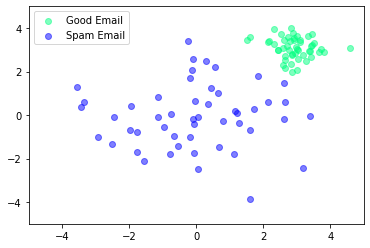

In [3]:
i = 50

plt.scatter(x[y==1][:i, 0], x[y==1][:i, 1], alpha=0.5, c="#00ff80", label="Good Email")
plt.scatter(x[y==0][:i, 0], x[y==0][:i, 1], alpha=0.5, c="blue", label="Spam Email")
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.legend()
plt.savefig("./figures/02_email-cluster-050.png", dpi=500, bbox_inches = 'tight', pad_inches = 0)

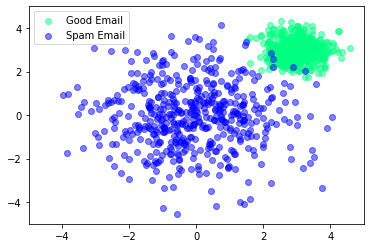

In [4]:
i = 500

plt.scatter(x[y==1][:i, 0], x[y==1][:i, 1], alpha=0.5, c="#00ff80", label="Good Email")
plt.scatter(x[y==0][:i, 0], x[y==0][:i, 1], alpha=0.5, c="blue", label="Spam Email")
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.legend()
plt.savefig("./figures/02_email-cluster-500.png", dpi=500, bbox_inches = 'tight', pad_inches = 0)

## Training the first linear SVM 

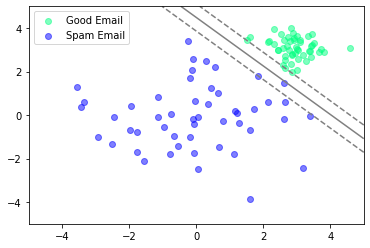

In [5]:
# use the first i samples
i = 50

#specify the SVMs parameter
classifier = sklearn.svm.SVC(C=10, gamma="scale", kernel="linear") #gamma=0.1 degree=3

# train the SVM
classifier.fit(x[:i], y[:i])

## plot the results
fig, ax = plt.subplots()


plt.scatter(x[y==1][:i, 0], x[y==1][:i, 1], alpha=0.5, c="#00ff80", label="Good Email")
plt.scatter(x[y==0][:i, 0], x[y==0][:i, 1], alpha=0.5, c="blue", label="Spam Email")


# calculate and plot decision boundary
xx = np.linspace(-5, 5, 30)
yy = np.linspace(-5, 5, 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = classifier.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='gray', levels=[-1, 0, 1],  linestyles=['--', '-', '--'])

plt.xlim(-5,5)
plt.ylim(-5,5)
plt.legend()
plt.savefig("./figures/02_email-svm-050-linear.png", dpi=500, bbox_inches = 'tight', pad_inches = 0)
plt.show()


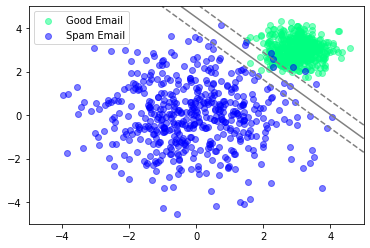

In [6]:
## plot the results
fig, ax = plt.subplots()

i = 500

plt.scatter(x[y==1][:i, 0], x[y==1][:i, 1], alpha=0.5, c="#00ff80", label="Good Email")
plt.scatter(x[y==0][:i, 0], x[y==0][:i, 1], alpha=0.5, c="blue", label="Spam Email")
#plt.scatter(X[:i, 0], X[:i, 1], c=y[:i], alpha=0.5, cmap="winter", label="Data points")


# calculate and plot decision boundary
xx = np.linspace(-5, 5, 30)
yy = np.linspace(-5, 5, 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = classifier.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='gray', levels=[-1, 0, 1],  linestyles=['--', '-', '--'])
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.legend()
plt.savefig("./figures/02_email-svm-500-linear.png", dpi=500, bbox_inches = 'tight', pad_inches = 0)
plt.show()


# Unsupervised Learning

In [7]:
import sklearn.cluster

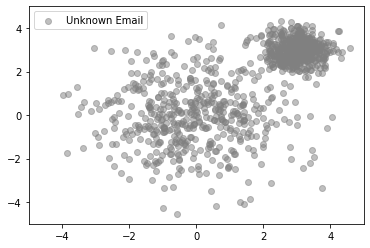

In [8]:
fig, ax = plt.subplots()
plt.scatter(x[:, 0], x[:, 1], c="gray", alpha=0.5, label="Unknown Email")
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.legend()
plt.savefig("./figures/02_email-kmeans-unknown.png", dpi=500, bbox_inches = 'tight', pad_inches = 0)
plt.show()

In [9]:
y_pred = sklearn.cluster.KMeans(n_clusters=2).fit_predict(x)

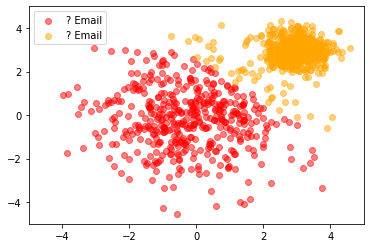

In [10]:
fig, ax = plt.subplots()

plt.scatter(x[y_pred == 1][:, 0], x[y_pred == 1][:, 1], alpha=0.5, c="red", label="? Email")
plt.scatter(x[y_pred == 0][:, 0], x[y_pred == 0][:, 1], alpha=0.5, c="orange", label="? Email")
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.legend()
plt.savefig("./figures/02_email-kmeans-cluster.png", dpi=500, bbox_inches = 'tight', pad_inches = 0)
plt.show()